In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [2]:
def hill_activation(x, K, n, ymin, ymax):
    
    return ymin + (ymax - ymin) * (x**n / (K**n + x**n))

def read_datasets(folder):
    
    names = ['fluos', 'ods', 'fluos-lower-1', 'fluos-lower-2', 'raw-fluos', 'raw-ods', 'raw-fluos-lower-1', 'raw-fluos-lower-2']
    datasets = []
    for name in names:
        datasets.append(pd.read_csv('datasets/experiment/{}/{}.csv'.format(folder, name), index_col='time'))
    return datasets

In [3]:
def get_control(fluos, idx):

    gfp = fluos[filter(lambda x: x.startswith('positive-control-amp'), fluos.columns)].mean(axis=1)
    neg_amp = fluos[filter(lambda x: x.startswith('negative-control-amp'), fluos.columns)].mean(axis=1)
    neg_kan = fluos[filter(lambda x: x.startswith('negative-control-kan'), fluos.columns)].mean(axis=1)
    neg_kan_h, gfp_h, neg_amp_h= neg_kan.iloc[idx], gfp.iloc[idx], neg_amp.iloc[idx]
    return neg_kan_h, gfp_h, neg_amp_h

def promoters_plots(row, col, data, inducers, promoters, h=8, sharex=True, sharey=False):
    
    idx = 3 * h
    responses = []
    ctrl = get_control(fluos_2, idx)
    
    f, axs = plt.subplots(row, col, sharex=sharex, sharey=sharey, figsize=(col*5, row*2))
    axr = axs.ravel()
    for i, ax in enumerate(axr):
        if i < len(promoters):
            response = []
            for j in range(12):
                d = data['{}_{}'.format(promoters[i], j)]
                rpu = (d.iloc[idx] - ctrl[0]) / (ctrl[1] - ctrl[2])
                ax.scatter(inducers[i][j], rpu, label=np.round(inducers[i][j], 5))
                ax.loglog()
                response.append(rpu)
            ax.set_title('{}_{}'.format(promoters[i], j))
            responses.append(response)
        else:
            ax.set_visible(False)
    
    sns.despine()
    plt.tight_layout()
    return responses

In [4]:
#ara, ohc14, cuma, ahl, dapg, sal, rha
induction_lvl = 11
max_inducers = [52, 160, 200, 40, 50, 1600, 15300]
inducer_stocks = []
for x, mi in enumerate(max_inducers):
    dil = 4 if x in [0, 3] else 2 #4x dilution for ara and ahl
    inducer = ([mi] + [mi/i for i in [dil**j for j in range(1, induction_lvl)]] + [0])
    inducer.reverse()
    inducer_stocks.append(inducer)

#### 029 - new promoters characterization

In [5]:
folder = '029-new-promoters-characterization-rep1'
fluos, ods, fluos_1, fluos_2, raw_fluos, raw_ods, raw_fluos_1, raw_fluos_2 = read_datasets(folder)
promoters = ['pBAD-rJ/Ara', 'araC-pBAD-rJ/Ara', 'cymRC-pCymRC-rJ/Cuma', 'pLux2-rJ/AHL', 'pPhlF-rJ/DAPG', 'rhaS-pRhaB-rJ/Rha', 'araC-pBAD/Ara']
inducers = [inducer_stocks[i] for i in [0, 0, 2, 3, 4, 6, 0]]

<ipython-input-3-2f06b1e38b86>:24: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.loglog()
<ipython-input-3-2f06b1e38b86>:23: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.scatter(inducers[i][j], rpu, label=np.round(inducers[i][j], 5))


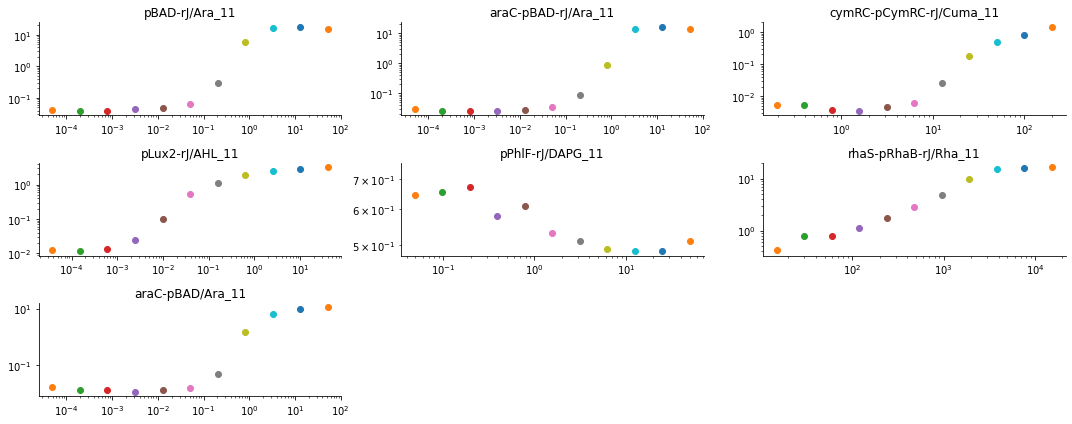

In [6]:
responses1 = promoters_plots(3, 3, fluos_2, inducers, promoters, 8, sharex=False)

#### 030 - new promoters characterization

In [7]:
folder = '030-new-promoters-characterization-rep2'
fluos, ods, fluos_1, fluos_2, raw_fluos, raw_ods, raw_fluos_1, raw_fluos_2 = read_datasets(folder)
promoters = ['araC-pBAD/Ara', 'pBAD-rJ/Ara', 'araC-pBAD-rJ/Ara', 'cymRC-pCymRC-rJ/Cuma', 'pCymRC-rJ/Cuma', 'pLux2-rJ/AHL', 'cymRC-pCymRC-rJ/Cuma.1']
inducers = [inducer_stocks[i] for i in [0, 0, 0, 2, 2, 3, 0]]

<ipython-input-3-2f06b1e38b86>:24: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.loglog()
<ipython-input-3-2f06b1e38b86>:23: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.scatter(inducers[i][j], rpu, label=np.round(inducers[i][j], 5))


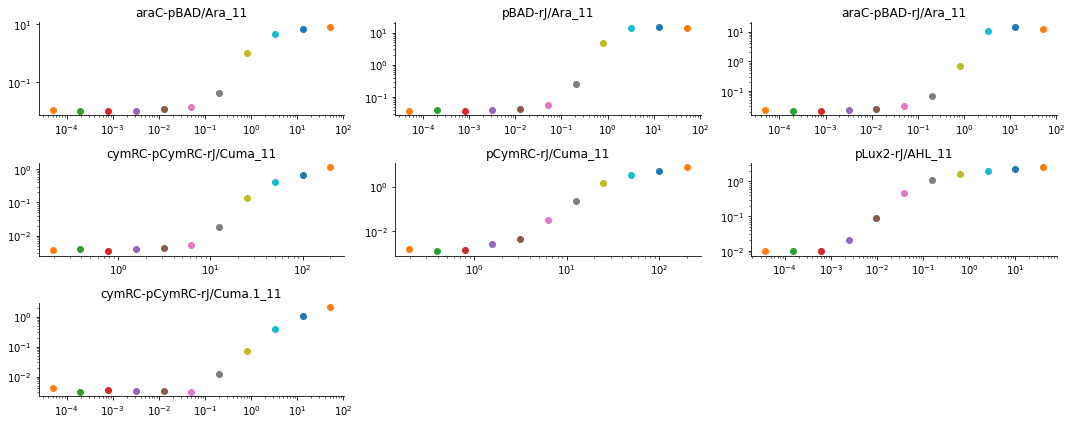

In [8]:
responses2 = promoters_plots(3, 3, fluos_2, inducers, promoters, 8, sharex=False)

#### 031 - new promoters characterization

In [9]:
folder = '031-new-promoters-characterization-rep3'
fluos, ods, fluos_1, fluos_2, raw_fluos, raw_ods, raw_fluos_1, raw_fluos_2 = read_datasets(folder)
promoters = ['araC-pBAD/Ara', 'pBAD-rJ/Ara', 'araC-pBAD-rJ/Ara', 'cymRC-pCymRC-rJ/Cuma', 'pCymRC-rJ/Cuma', 'pLux2-rJ/AHL', 'cymRC-pCymRC-rJ/Cuma.1']
inducers = [inducer_stocks[i] for i in [0, 0, 0, 2, 2, 3, 0]]

<ipython-input-3-2f06b1e38b86>:24: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.loglog()
<ipython-input-3-2f06b1e38b86>:23: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.scatter(inducers[i][j], rpu, label=np.round(inducers[i][j], 5))


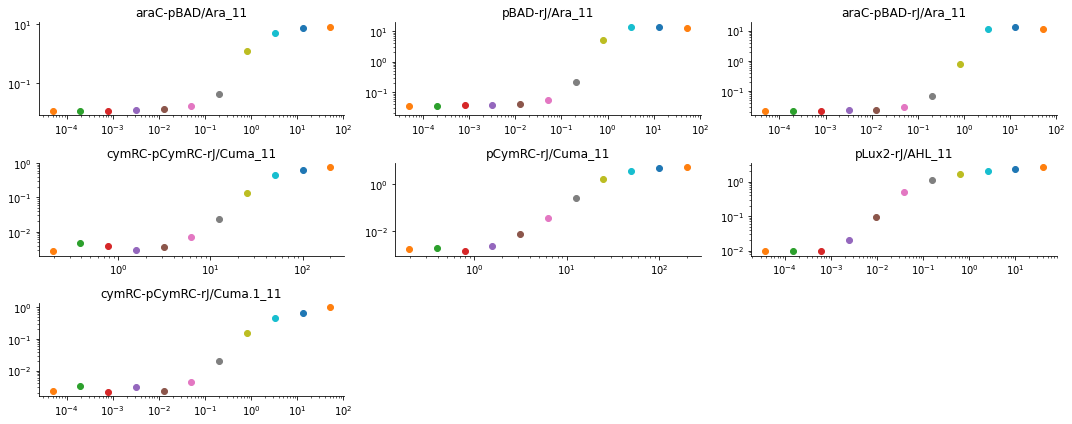

In [10]:
responses3 = promoters_plots(3, 3, fluos_2, inducers, promoters, 8, sharex=False)

#### Combined

In [11]:
responses = []
for i in range(len(responses1)):
    responses.append(np.mean([responses2[i], responses3[i]], axis=0))
responses

[array([0.01338554, 0.01136731, 0.01088212, 0.01097695, 0.01101962,
        0.01227765, 0.01520147, 0.04248301, 1.12901686, 4.76566733,
        7.11135668, 8.16968051]),
 array([ 0.0317391 ,  0.03653896,  0.03674441,  0.03662747,  0.03822213,
         0.04134824,  0.05602895,  0.23391828,  4.8775595 , 13.36397921,
        14.68671113, 13.48661486]),
 array([ 0.0241341 ,  0.0219278 ,  0.02191833,  0.02153112,  0.02250151,
         0.02404717,  0.0307024 ,  0.06908812,  0.74129656, 11.17225101,
        14.27103669, 12.16817894]),
 array([0.00500131, 0.00318853, 0.00433278, 0.00365793, 0.00347933,
        0.00395505, 0.00634626, 0.02077253, 0.13318123, 0.43252598,
        0.65296548, 0.96387734]),
 array([2.77605157e-03, 1.63654584e-03, 1.53697985e-03, 1.39789829e-03,
        2.41253887e-03, 6.09497723e-03, 3.38791103e-02, 2.46748616e-01,
        1.51181646e+00, 3.52734366e+00, 4.89719279e+00, 6.52883258e+00]),
 array([0.01092953, 0.00992437, 0.00959089, 0.00978055, 0.02091474,
        0.

In [12]:
df_res = pd.DataFrame(responses).T
df_res.columns = promoters
df_ind = pd.DataFrame(inducers).T
df_ind.columns = promoters

araC-pBAD/Ara [2.66291884e+00 1.46410630e+00 1.09578136e-17 8.09436824e+00] 0.9986092693811468
pBAD-rJ/Ara [ 1.03967452  2.61189959  0.03906816 14.0799079 ] 0.9982123246699125
araC-pBAD-rJ/Ara [ 1.94872511  3.34451062  0.03274894 13.21924766] 0.9935887209766933
cymRC-pCymRC-rJ/Cuma [6.85625587e+01 1.80514983e+00 2.11405084e-16 1.06387734e+00] 0.9935195420577768
pCymRC-rJ/Cuma [4.92424883e+01 1.90135976e+00 4.35162489e-17 6.62883258e+00] 0.9943271618297364
pLux2-rJ/AHL [3.01597471e-01 6.97759121e-01 1.27923614e-19 2.58856404e+00] 0.9939639972820646
cymRC-pCymRC-rJ/Cuma.1 [9.73882380e+00 1.13860583e+00 6.79454020e-03 1.62168580e+00] 0.9896751521647132


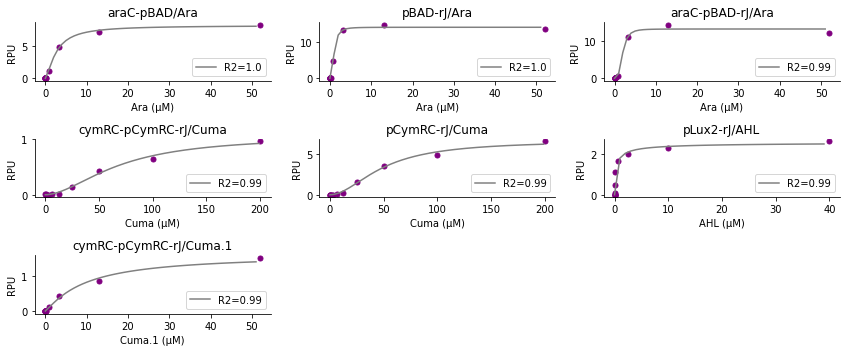

In [13]:
all_params = []
f, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(12, 5))
axr = axs.ravel()

for i, ax in enumerate(axr):
    
    if i < len(promoters):
        
        y = df_res[promoters[i]]
        x = df_ind[promoters[i]]
        init_guess = [1, 1, y.min(), y.max()]
        gate_bounds = [[0, 0, 0, 0],
                       [1e4, 4, y.min()+0.1, y.max()+0.1]]
        
        popt, pcov = curve_fit(hill_activation, x, y, p0=init_guess, bounds=gate_bounds)
        
        ax.scatter(x, y, color='purple', s=25)
        err = np.round(r2_score(y, hill_activation(x, *popt)), 2)
        ax.plot(np.arange(x.max()), hill_activation(np.arange(x.max()), *popt), color='gray', label='R2='+str(err))
        
        all_params.append(popt)
        print(promoters[i], popt, r2_score(y, hill_activation(x, *popt)))
        
        #ax.set_xscale('symlog')
        #ax.set_yscale('symlog')
        
        ax.set_title('{}'.format(promoters[i]))
        ax.set_ylabel('RPU')
        ax.set_xlabel('{} ({})'.format(promoters[i].split('/')[1], u"\u03bcM"))
        ax.legend(loc=4)
        
    else:
        ax.set_visible(False)
        
    sns.despine()
plt.tight_layout()

In [98]:
cumas_rpu = [hill_activation(i, *all_params[3]) for i in inducers[3]]
aras_rpu = [hill_activation(i, *all_params[0]) for i in inducers[0]]
print(cumas_rpu)
print(aras_rpu)

[2.1140508404516445e-16, 2.7047665898860338e-05, 9.451625298535184e-05, 0.0003302284614102914, 0.0011531414537870638, 0.004018963831028541, 0.013913767421852795, 0.04708753302668632, 0.1481921474634383, 0.38432925220642106, 0.706446628596465, 0.9293291591323222]
[1.0957813643749393e-17, 9.616714565243556e-07, 7.319917914409823e-06, 5.571645038954436e-05, 0.00042407581172822093, 0.003226806453408724, 0.024496811802333627, 0.1828037699219538, 1.2106667891676, 4.633309896886311, 7.370992838892073, 7.99133502045251]


In [14]:
cumas_rpu = [hill_activation(i, *all_params[3]) for i in [0, 6.25, 12.5, 25, 50, 100]]
aras_rpu = [hill_activation(i, *all_params[0]) for i in [0, 0.81, 1.62, 3.25, 6.5, 13]]
print(cumas_rpu)
print(aras_rpu)

[2.1140508404516445e-16, 0.013913767421852795, 0.04708753302668632, 0.1481921474634383, 0.38432925220642106, 0.706446628596465]
[1.0957813643749393e-17, 1.2060287427482614, 2.636411170614044, 4.633309896886311, 6.3697279021373925, 7.370992838892073]


In [100]:
cumas_rpu2 = [hill_activation(i, *all_params[4]) for i in [0, 6.25, 12.5, 25, 50, 100]]
aras_rpu2 = [hill_activation(i, *all_params[1]) for i in [0, 0.8125, 3.25, 13, 52, 208]]
print(cumas_rpu2)
print(aras_rpu2)

[4.351624888479863e-17, 0.12836646443345376, 0.4554069181682603, 1.4320915855505334, 3.36251583462493, 5.260842521395112]
[0.039068156451732144, 4.874070477308016, 13.399205481456802, 14.060790558956999, 14.079395648916492, 14.07989419214939]


#### Cherrypicking 3 Promoters Characterization - 24 induction levels

In [89]:
folder = '011-3-promoters-detailed-characterization'
fluos, ods, fluos_1, fluos_2 = read_datasets(folder)

In [41]:
promoters = ['pBAD/Ara', 'pCymRC/Cuma', 'pRhaB/Rha']
aras = [0, 4.95911E-05, 9.91821E-05, 0.000198364, 0.000396729, 0.000793457, 0.001586914, 0.003173828, 0.006347656, 0.012695313, 0.025390625, 0.05078125, 0, 0.1015625, 0.203125, 0.40625, 0.8125, 1.625, 3.25, 6.5, 13, 26, 52, 104]
cumas = [0, 0.001525879, 0.003051758, 0.006103516, 0.012207031, 0.024414063, 0.048828125, 0.09765625, 0.1953125, 0.390625, 0.78125, 1.5625, 0, 3.125, 6.25, 12.5, 25, 50, 100, 200, 400, 800, 1600, 3200]
rhas = [0, 0.014591217, 0.029182434, 0.058364868, 0.116729736, 0.233459473, 0.466918945, 0.933837891, 1.867675781, 3.735351563, 7.470703125, 14.94140625, 0, 29.8828125, 59.765625, 119.53125, 239.0625, 478.125, 956.25, 1912.5, 3825, 7650, 15300, 30600]
inducers = [aras, cumas, rhas]

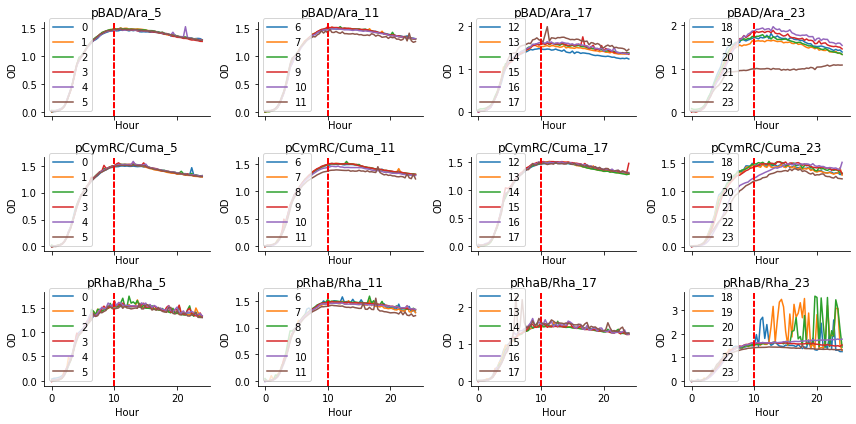

In [75]:
f, axs = plt.subplots(3, 4, sharex=True, sharey=False, figsize=(12, 6))
for i in range(3):
    for j in range(0, 6):
        r0 = ods['{}_{}'.format(promoters[i], j)]
        axs[i, 0].plot(r0.index/60, r0, label=j)#, color='darkblue')
        axs[i, 0].axvline(10, color='red', linestyle='--')
        axs[i, 0].legend()
        axs[i, 0].set_title('{}_{}'.format(promoters[i], j))
        axs[i, 0].set_ylabel('OD')
        axs[i, 0].set_xlabel('Hour')
    for j in range(6, 12):
        r0 = ods['{}_{}'.format(promoters[i], j)]
        axs[i, 1].plot(r0.index/60, r0, label=j)#, color='darkblue')
        axs[i, 1].axvline(10, color='red', linestyle='--')
        axs[i, 1].legend()
        axs[i, 1].set_title('{}_{}'.format(promoters[i], j))
        axs[i, 1].set_ylabel('OD')
        axs[i, 1].set_xlabel('Hour')
    for j in range(12, 18):
        r0 = ods['{}_{}'.format(promoters[i], j)]
        axs[i, 2].plot(r0.index/60, r0, label=j)#, color='darkblue')
        axs[i, 2].axvline(10, color='red', linestyle='--')
        axs[i, 2].legend()
        axs[i, 2].set_title('{}_{}'.format(promoters[i], j))
        axs[i, 2].set_ylabel('OD')
        axs[i, 2].set_xlabel('Hour')
    for j in range(18, 24):
        r0 = ods['{}_{}'.format(promoters[i], j)]
        axs[i, 3].plot(r0.index/60, r0, label=j)#, color='darkblue')
        axs[i, 3].axvline(10, color='red', linestyle='--')
        axs[i, 3].legend()
        axs[i, 3].set_title('{}_{}'.format(promoters[i], j))
        axs[i, 3].set_ylabel('OD')
        axs[i, 3].set_xlabel('Hour')
sns.despine()
plt.tight_layout()

In [108]:
def get_control(fluos, h):

    idx = 3 * h
    gfp = fluos[filter(lambda x: x.startswith('positive-control-amp'), fluos.columns)].mean(axis=1)
    neg_amp = fluos[filter(lambda x: x.startswith('negative-control-amp'), fluos.columns)].mean(axis=1)
    neg_kan = fluos[filter(lambda x: x.startswith('negative-control-kan'), fluos.columns)].mean(axis=1)
    neg_kan_10, gfp_10, neg_amp_10 = neg_kan.iloc[idx], gfp.iloc[idx], neg_amp.iloc[idx]
    return neg_kan_10, gfp_10, neg_amp_10

def promoters_plots(row, col, data, inducers, promoters, ctrl, h, sharex=True, sharey=False):
    
    idx = 3 * h
    responses = []
    f, axs = plt.subplots(row, col, sharex=sharex, sharey=sharey, figsize=(col*5, row*2))
    axr = axs.ravel()
    for i, ax in enumerate(axr):
        if i < len(promoters):
            response = []
            for j in range(12):
                #if j < 12:
                #    if j%2==1:
                #        continue
                #else:
                #    if j%2==0:
                #        continue
                d = data['{}_{}'.format(promoters[i], j)]
                rpu = (d.iloc[idx] - ctrl[0]) / (ctrl[1] - ctrl[2])
                ax.scatter(inducers[i][j], rpu, label=np.round(inducers[i][j], 5))
                ax.loglog()
                #ax.set_xscale('symlog')
                #ax.set_yscale('symlog')
                #print(promoters[i], j, inducers[i][j])
                response.append(rpu)
            ax.set_title('{}_{}'.format(promoters[i], j))
            #ax.set_xticks(np.arange(12))
            #ax.set_xticklabels([np.round(u, 2) for u in inducers[i]], rotation=45)
            #ax.legend()
            responses.append(response)
        else:
            ax.set_visible(False)
    sns.despine()
    plt.tight_layout()
    return responses

In [111]:
aras_cp = [(4.95911e-05/4), 4.95911e-05, 0.000198364, 0.000793457, 0.003173828, 0.012695313, 0.05078125, 0.203125, 0.8125, 3.25, 13, 52]
rhas_cp = [(0.014591217/4), 0.014591217, 0.058364868, 0.233459473, 0.933837891, 3.735351563, 14.94140625, 59.765625, 239.0625, 956.25, 3825, 15300]
inducers_cp = [aras_cp, rhas_cp]
promoters_cp = ['pBAD/Ara', 'pRhaB/Rha']

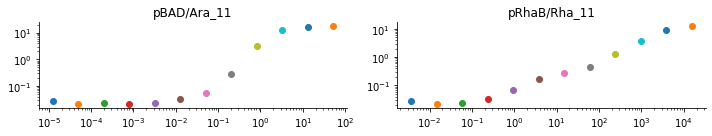

In [112]:
responses = promoters_plots(1, 2, fluos_2, inducers_cp, promoters_cp, get_control(fluos_2, 10), 10, sharex=False)

<ipython-input-86-e8fbefd71660>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.loglog()
<ipython-input-86-e8fbefd71660>:28: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.scatter(inducers[i][j], rpu, label=np.round(inducers[i][j], 5))


pBAD/Ara 0 0
pBAD/Ara 2 9.91821e-05
pBAD/Ara 4 0.000396729
pBAD/Ara 6 0.001586914
pBAD/Ara 8 0.006347656
pBAD/Ara 10 0.025390625
pBAD/Ara 13 0.1015625
pBAD/Ara 15 0.40625
pBAD/Ara 17 1.625
pBAD/Ara 19 6.5
pBAD/Ara 21 26
pBAD/Ara 23 104
pCymRC/Cuma 0 0
pCymRC/Cuma 2 0.003051758
pCymRC/Cuma 4 0.012207031
pCymRC/Cuma 6 0.048828125
pCymRC/Cuma 8 0.1953125
pCymRC/Cuma 10 0.78125
pCymRC/Cuma 13 3.125
pCymRC/Cuma 15 12.5
pCymRC/Cuma 17 50
pCymRC/Cuma 19 200
pCymRC/Cuma 21 800
pCymRC/Cuma 23 3200
pRhaB/Rha 0 0
pRhaB/Rha 2 0.029182434
pRhaB/Rha 4 0.116729736
pRhaB/Rha 6 0.466918945
pRhaB/Rha 8 1.867675781
pRhaB/Rha 10 7.470703125
pRhaB/Rha 13 29.8828125
pRhaB/Rha 15 119.53125
pRhaB/Rha 17 478.125
pRhaB/Rha 19 1912.5
pRhaB/Rha 21 7650
pRhaB/Rha 23 30600


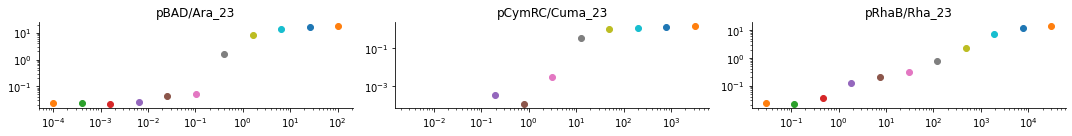

In [87]:
responses = promoters_plots(1, 3, fluos_2, inducers, promoters, get_control(fluos_2, 10), 10, sharex=False)

#### Promoters Characterization - 6 induction levels

In [ ]:
folder = '004-promoters-characterization'
fluos, ods, fluos_1, fluos_2 = read_datasets(folder)
fluos_ods = fluos_2 / ods

In [ ]:
aras = [0, 0.8125, 3.25, 13, 52, 208]
ohcs = [0, 0.039, 0.156, 0.625, 2.5, 10]
cumas = [0, 6.25, 12.5, 25, 50, 100]
ahls = [0, 0.039, 0.156, 0.625, 2.5, 10]
dapgs = [0, 0.098, 0.391, 1.563, 6.25, 25]
sals = [0, 0.391, 1.563, 6.25, 25, 100]
rhas = [0, 59.766, 239.063, 956.25, 3825, 15300]
inducers = [aras, ohcs, cumas, ahls, dapgs, sals, rhas]

In [ ]:
idx = 3 * 10
gfp = fluos_2[filter(lambda x: x.startswith('positive-control-amp'), fluos_ods.columns)].mean(axis=1)
neg = fluos_2[filter(lambda x: x.startswith('negative-control-kan'), fluos_ods.columns)].mean(axis=1)
gfp10, neg10 = gfp.iloc[idx], neg.iloc[idx]
gfp10, neg10

In [ ]:
f, axs = plt.subplots(7, 2, sharex=True, sharey=False, figsize=(6, 10))
for i in range(7):
    for j in range(3):
        r0 = ods['{}_{}'.format(promoters[i], j)]
        axs[i, 0].plot(r0.index/60, r0, label=j)#, color='darkblue')
        axs[i, 0].axvline(10, color='red', linestyle='--')
        axs[i, 0].legend()
        axs[i, 0].set_title('{}_{}'.format(promoters[i], j))
        axs[i, 0].set_ylabel('OD')
        axs[i, 0].set_xlabel('Hour')
    for j in range(3, 6):
        r0 = ods['{}_{}'.format(promoters[i], j)]
        axs[i, 1].plot(r0.index/60, r0, label=j)#, color='darkblue')
        axs[i, 1].axvline(10, color='red', linestyle='--')
        axs[i, 1].legend()
        axs[i, 1].set_title('{}_{}'.format(promoters[i], j))
        axs[i, 1].set_ylabel('OD')
        axs[i, 1].set_xlabel('Hour')
sns.despine()
plt.tight_layout()

In [ ]:
def promoters_plots(row, col, data, promoters, sharex=True, sharey=False):
    
    #xs = np.arange(12)
    responses = []
    f, axs = plt.subplots(row, col, sharex=sharex, sharey=sharey, figsize=(col*3, row*2))
    axr = axs.ravel()
    for i, ax in enumerate(axr):
        if i < len(promoters):
            response = []
            for j in range(6):
                d = data['{}_{}'.format(promoters[i], j)]
                rpu = (d.iloc[idx] - neg.iloc[idx]) / (gfp.iloc[idx] - neg.iloc[idx])
                ax.scatter(np.log(inducers[i][j]), np.log(rpu))
                response.append(rpu)
            ax.set_title('{}_{}'.format(promoters[i], j))
            #ax.set_xticks(np.arange(12))
            #ax.set_xticklabels([np.round(u, 2) for u in inducers[i]], rotation=45)
            responses.append(response)
        else:
            ax.set_visible(False)
    sns.despine()
    plt.tight_layout()
    
    return responses

responses = promoters_plots(2, 4, fluos_2, promoters, sharex=False, sharey=False)

#### Promoters Characterization - 12 induction levels

In [132]:
def get_control(fluos, h):

    idx = 3 * h
    gfp = fluos[filter(lambda x: x.startswith('positive-control-amp'), fluos.columns)].mean(axis=1)
    neg_amp = fluos[filter(lambda x: x.startswith('negative-control-amp'), fluos.columns)].mean(axis=1)
    neg_kan = fluos[filter(lambda x: x.startswith('negative-control-kan'), fluos.columns)].mean(axis=1)
    neg_kan_10, gfp_10, neg_amp_10 = neg_kan.iloc[idx], gfp.iloc[idx], neg_amp.iloc[idx]
    return neg_kan_10, gfp_10, neg_amp_10

def promoters_plots(row, col, data, inducers, promoters, ctrl, h, sharex=True, sharey=False):
    
    idx = 3 * h
    responses = []
    f, axs = plt.subplots(row, col, sharex=sharex, sharey=sharey, figsize=(col*3, row*2))
    axr = axs.ravel()
    for i, ax in enumerate(axr):
        if i < len(promoters):
            response = []
            for j in range(12):
                d = data['{}_{}'.format(promoters[i], j)]
                rpu = (d.iloc[idx] - ctrl[0]) / (ctrl[1] - ctrl[2])
                ax.scatter(inducers[i][j], rpu, label=np.round(inducers[i][j], 2))
                ax.loglog()
                #ax.set_xscale('symlog')
                #ax.set_yscale('symlog')
                response.append(rpu)
            ax.set_title('{}_{}'.format(promoters[i], j))
            #ax.set_xticks(np.arange(12))
            #ax.set_xticklabels([np.round(u, 2) for u in inducers[i]], rotation=45)
            #ax.legend(bbox_to_anchor=(1.1, 1.1))
            responses.append(response)
        else:
            ax.set_visible(False)
    sns.despine()
    plt.tight_layout()
    return responses

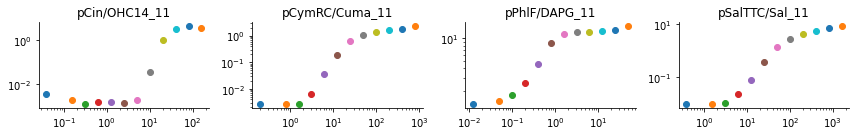

In [152]:
#006
folder = '006-promoters-characterization'
fluos, ods, fluos_1, fluos_2 = read_datasets(folder)
aras = [(0.40625/4), 0.40625, 0.8125, 1.625, 3.25, 6.5, 13, 26, 52, 104, 208, 416]
ohcs = [(0.15625/4), 0.15625, 0.3125, 0.625, 1.25, 2.5, 5, 10, 20, 40, 80, 160]
cumas = [(0.78125/4), 0.78125, 1.5625, 3.125, 6.25, 12.5, 25, 50, 100, 200, 400, 800]
ahls = [(0.01953125/4), 0.01953125, 0.0390625, 0.078125, 0.15625, 0.3125, 0.625, 1.25, 2.5, 5, 10, 20]
dapgs = [(0.048828125/4), 0.048828125, 0.09765625, 0.1953125, 0.390625, 0.78125, 1.5625, 3.125, 6.25, 12.5, 25, 50]
sals = [(1.5625/4), 1.5625, 3.125, 6.25, 12.5, 25, 50, 100, 200, 400, 800, 1600]
rhas = [(14.94140625/4), 14.94140625, 29.8828125, 59.765625, 119.53125, 239.0625, 478.125, 956.25, 1912.5, 3825, 7650, 15300]
inducers = [ohcs, cumas, dapgs, sals]
promoters = ['pCin/OHC14', 'pCymRC/Cuma', 'pPhlF/DAPG', 'pSalTTC/Sal']
responses = promoters_plots(1, 4, fluos_2, inducers, promoters, get_control(fluos_2, 10), 10, sharex=False)

In [153]:
df_res1 = pd.DataFrame(responses).T
df_res1.columns = promoters
df_ind1 = pd.DataFrame(inducers).T
df_ind1.columns = promoters

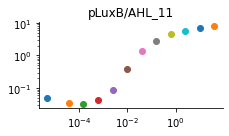

In [154]:
#010 - AHL & Rha
folder = '010-promoters-characterization'
fluos, ods, fluos_1, fluos_2 = read_datasets(folder)
aras = [(0.406/8), 0.406, 0.609, 0.813, 1.219, 1.625, 2.438, 3.25, 6.5, 13, 26, 104]
ohcs = [(8/4), 8, 10, 16, 20, 32, 40, 64, 80, 128, 160, 320]
cumas = [(3.125/4), 3.125, 6.25, 12.5, 25, 50, 100, 200, 400, 800, 1600, 3200]
ahls = [(3.81e-5/8), 3.81e-5, 1.53e-4, 6.1e-4, 2.44e-3, 9.77e-3, 3.91e-2, 0.156, 0.625, 2.5, 10, 40]
dapgs = [(0.048828125/4), 0.048828125, 0.09765625, 0.1953125, 0.390625, 0.78125, 1.5625, 3.125, 6.25, 12.5, 25, 50] #does not matter
sals = [(25/4), 25, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
rhas = [(29.88/4), 29.88, 59.76, 119.53, 239.06, 478.125, 956.25, 1912.5, 3825, 7650, 15300, 30600]
inducers = [ahls]
promoters = [ 'pLuxB/AHL']
responses = promoters_plots(1, 2, fluos_2, inducers, promoters, get_control(fluos_2, 10), 10, sharex=False)

In [155]:
df_res2 = pd.DataFrame(responses).T
df_res2.columns = promoters
df_ind2 = pd.DataFrame(inducers).T
df_ind2.columns = promoters

In [156]:
df_res = pd.concat([df_res1, df_res2], axis=1)
df_ind = pd.concat([df_ind1, df_ind2], axis=1)

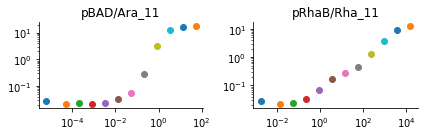

In [157]:
#011
folder = '011-3-promoters-detailed-characterization'
fluos, ods, fluos_1, fluos_2 = read_datasets(folder)
aras_cp = [(4.95911e-05/8), 4.95911e-05, 0.000198364, 0.000793457, 0.003173828, 0.012695313, 0.05078125, 0.203125, 0.8125, 3.25, 13, 52]
rhas_cp = [(0.014591217/8), 0.014591217, 0.058364868, 0.233459473, 0.933837891, 3.735351563, 14.94140625, 59.765625, 239.0625, 956.25, 3825, 15300]
inducers = [aras_cp, rhas_cp]
promoters = ['pBAD/Ara', 'pRhaB/Rha']

responses = promoters_plots(1, 2, fluos_2, inducers, promoters, get_control(fluos_2, 10), 10, sharex=False)

In [158]:
df_res3 = pd.DataFrame(responses).T
df_res3.columns = promoters
df_ind3 = pd.DataFrame(inducers).T
df_ind3.columns = promoters

In [159]:
df_res = pd.concat([df_res, df_res3], axis=1)
df_ind = pd.concat([df_ind, df_ind3], axis=1)

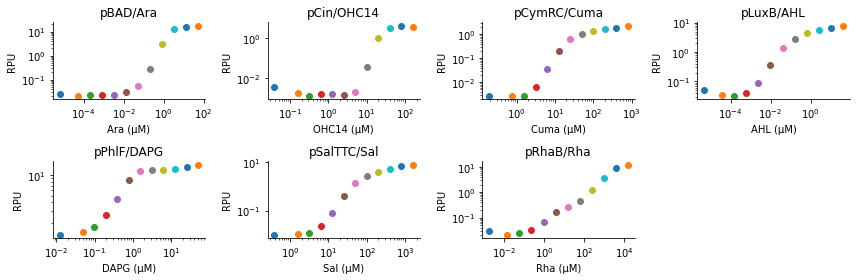

In [162]:
def promoters_combined_plots(row, col, data, inducers):
    
    cols = ['pBAD/Ara', 'pCin/OHC14', 'pCymRC/Cuma', 'pLuxB/AHL', 'pPhlF/DAPG', 'pSalTTC/Sal', 'pRhaB/Rha']
    #ind_names = ['OHC14', 'Cuma', 'DAPG', 'Sal', 'AHL', 'Ara', 'Rha']
    #cols = data.columns.tolist()
    f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*3, row*2))
    axr = axs.ravel()
    for i, ax in enumerate(axr):
        if i < len(cols):
            for x, y in zip(inducers[cols[i]], data[cols[i]]):
                ax.scatter(x, y)
                ax.loglog()
            ax.set_title('{}'.format(cols[i]))
            ax.set_ylabel('RPU')
            ax.set_xlabel('{} ({})'.format(cols[i].split('/')[1], u"\u03bcM"))
        else:
            ax.set_visible(False)
    sns.despine()
    plt.tight_layout()
                         
promoters_combined_plots(2, 4, df_res, df_ind)

In [164]:
df_res.to_csv('datasets/experiment/responses.csv', index=False)
df_ind.to_csv('datasets/experiment/inducers.csv', index=False)

#### Response Function

In [4]:
promoters = ['pBAD/Ara', 'pCin/OHC14', 'pCymRC/Cuma', 'pLuxB/AHL', 'pPhlF/DAPG', 'pSalTTC/Sal', 'pRhaB/Rha']
responses = pd.read_csv('datasets/experiment/responses.csv')
inducers = pd.read_csv('datasets/experiment/inducers.csv')

In [5]:
for i in range(responses.shape[1]):
    responses.iloc[:,i] = (responses.iloc[:,i] - responses.iloc[:,i].min())
responses

,pCin/OHC14,pCymRC/Cuma,pPhlF/DAPG,pSalTTC/Sal,pLuxB/AHL,pBAD/Ara,pRhaB/Rha
0,0.002317,0.000000,0.000000,0.000000,0.018800,0.005354,0.007257
1,0.000596,0.000000,0.127065,0.000530,0.001552,0.000000,0.000000
2,0.000000,0.000000,0.402649,0.001126,0.000000,0.001620,0.002254
3,0.000331,0.003907,1.232975,0.013177,0.009429,0.001057,0.011061
4,0.000397,0.033968,3.182983,0.071776,0.055825,0.002889,0.046287
5,0.000199,0.194008,7.192319,0.374176,0.345186,0.010850,0.147457
6,0.000662,0.641218,10.068465,1.326204,1.336821,0.034169,0.246301
7,0.034564,1.061943,10.612746,2.722066,2.765228,0.251867,0.435395
8,1.005396,1.393147,10.761993,4.004767,4.500877,3.088629,1.252783
9,3.112200,1.605165,11.141334,5.392617,5.770891,13.051148,3.633225


In [15]:
np.round(responses[['pBAD/Ara', 'pCymRC/Cuma']].T, 2)

,0,1,2,3,4,5,6,7,8,9,10,11
pBAD/Ara,0.01,0.0,0.0,0.0,0.00,0.01,0.03,0.25,3.09,13.05,15.87,17.32
pCymRC/Cuma,0.00,0.0,0.0,0.0,0.03,0.19,0.64,1.06,1.39,1.61,1.80,2.26


pBAD/Ara [ 9.61808217 10.         -0.43816567 18.31745808] 0.960406839191911
pCin/OHC14 [ 9.6784396  10.         -0.09784937  4.65291418] 0.9549048068988369
pCymRC/Cuma [ 8.73605962  5.13805088 -0.0340543   2.54860735] 0.990288938119106
pLuxB/AHL [ 8.98785001  6.76098679 -0.04202406  8.77072708] 0.9990892871165086
pPhlF/DAPG [ 5.72730133  6.55612827  0.09418755 12.0704188 ] 0.9908290511979281
pSalTTC/Sal [ 9.27293139  6.56517605 -0.01481621  9.10826022] 0.9964688813937278
pRhaB/Rha [10.47581299 10.         -0.15974505 13.46526701] 0.9605500411795371


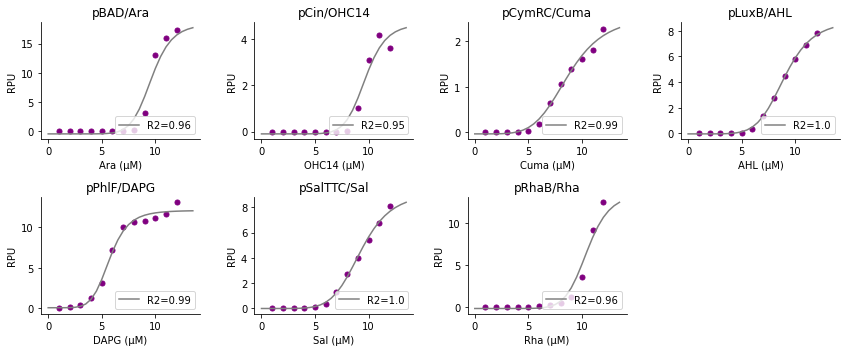

In [7]:
all_params = []
f, axs = plt.subplots(2, 4, sharex=False, sharey=False, figsize=(12, 5))
axr = axs.ravel()
for i, ax in enumerate(axr):
    if i < len(promoters):
        y = responses[promoters[i]]
        x = np.arange(1, len(y)+1)
        #x = inducers[promoters[i]]
        init_guess = [1, 1, y.min(), y.max()]
        gate_bounds = [[0, 0, y.min()-1, y.max()-1],
                       [1e4, 10, y.min()+1, y.max()+1]]
        
        popt, pcov = curve_fit(hill_activation, x, y, p0=init_guess, bounds=gate_bounds)
        
        ax.scatter(x, y, color='purple', s=25)
        err = np.round(r2_score(y, hill_activation(x, *popt)), 2)
        #err = np.sum([(a - b)**2 for a, b in zip(y, hill_activation(x, *popt))])
        ax.plot(np.arange(0, x.max()+2, 0.5), hill_activation(np.arange(0, x.max()+2, 0.5), *popt), color='gray', label='R2=' + str(err))
        
        all_params.append(popt)
        print(promoters[i], popt, r2_score(y, hill_activation(x, *popt)))
        #ax.loglog()
        #ax.set_xscale('symlog')
        #ax.set_yscale('symlog')
        #ax.set_xticks(np.arange(len(inducers[promoters[i]])))
        #ax.set_xticklabels(None)
        
        ax.set_title('{}'.format(promoters[i]))
        ax.set_ylabel('RPU')
        ax.set_xlabel('{} ({})'.format(promoters[i].split('/')[1], u"\u03bcM"))
        ax.legend(loc=4)
    else:
        ax.set_visible(False)
    sns.despine()
plt.tight_layout()

pBAD/Ara [1.74213800e+00 1.92163451e+00 2.47550696e-17 1.68274590e+01] 0.9987537384390985
pCin/OHC14 [2.68637653e+01 3.76978306e+00 2.25669610e-20 3.89971446e+00] 0.9925077932755642
pCymRC/Cuma [6.44170106e+01 1.12618630e+00 3.64441223e-29 2.20430141e+00] 0.984576025919484
pLuxB/AHL [4.45531098e-01 6.66717261e-01 7.98396307e-17 7.89302613e+00] 0.9972086124860509
pPhlF/DAPG [6.30651173e-01 1.82449594e+00 3.12008509e-21 1.16856523e+01] 0.9894756945922277
pSalTTC/Sal [2.05252320e+02 1.21883212e+00 6.98142191e-25 8.20826022e+00] 0.9940749228499952
pRhaB/Rha [1.79586819e+03 1.38299926e+00 1.00000000e-01 1.25652670e+01] 0.9969512610507115


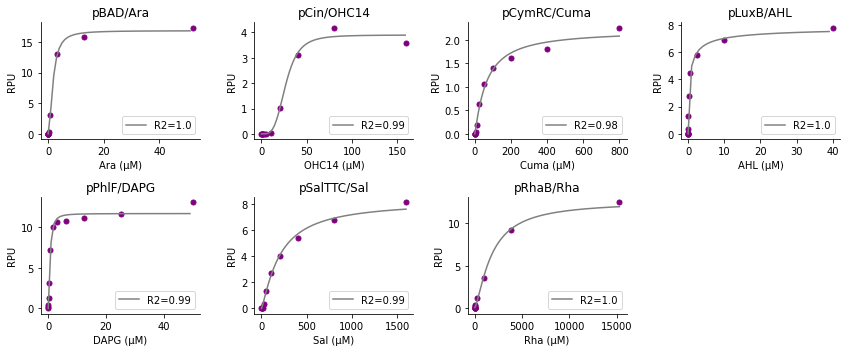

In [8]:
all_params = []
f, axs = plt.subplots(2, 4, sharex=False, sharey=False, figsize=(12, 5))
axr = axs.ravel()
for i, ax in enumerate(axr):
    if i < len(promoters):
        y = responses[promoters[i]]
        x = inducers[promoters[i]]
        init_guess = [1, 1, y.min(), y.max()]
        gate_bounds = [[0, 0, 0, 0],
                       [1e4, 4, y.min()+0.1, y.max()+0.1]]
        
        popt, pcov = curve_fit(hill_activation, x, y, p0=init_guess, bounds=gate_bounds)
        
        ax.scatter(x, y, color='purple', s=25)
        err = np.round(r2_score(y, hill_activation(x, *popt)), 2)
        #err = np.sum([(a - b)**2 for a, b in zip(y, hill_activation(x, *popt))])
        ax.plot(np.arange(x.max()), hill_activation(np.arange(x.max()), *popt), color='gray', label='R2='+str(err))
        
        all_params.append(popt)
        print(promoters[i], popt, r2_score(y, hill_activation(x, *popt)))
        #ax.loglog()
        #ax.set_xscale('symlog')
        #ax.set_yscale('symlog')
        
        ax.set_title('{}'.format(promoters[i]))
        ax.set_ylabel('RPU')
        ax.set_xlabel('{} ({})'.format(promoters[i].split('/')[1], u"\u03bcM"))
        ax.legend(loc=4)
    else:
        ax.set_visible(False)
    sns.despine()
plt.tight_layout()

In [9]:
inducers

,pCin/OHC14,pCymRC/Cuma,pPhlF/DAPG,pSalTTC/Sal,pLuxB/AHL,pBAD/Ara,pRhaB/Rha
0,0.00000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
1,0.15625,0.78125,0.048828,1.5625,0.000038,0.000050,0.014591
2,0.31250,1.56250,0.097656,3.1250,0.000153,0.000198,0.058365
3,0.62500,3.12500,0.195312,6.2500,0.000610,0.000793,0.233459
4,1.25000,6.25000,0.390625,12.5000,0.002440,0.003174,0.933838
5,2.50000,12.50000,0.781250,25.0000,0.009770,0.012695,3.735352
6,5.00000,25.00000,1.562500,50.0000,0.039100,0.050781,14.941406
7,10.00000,50.00000,3.125000,100.0000,0.156000,0.203125,59.765625
8,20.00000,100.00000,6.250000,200.0000,0.625000,0.812500,239.062500
9,40.00000,200.00000,12.500000,400.0000,2.500000,3.250000,956.250000


In [10]:
for j, c in enumerate(promoters):
    print('"', c.split('/')[1].lower(), '_rpu":', [hill_activation(i, *all_params[j]) for i in inducers[c]])

" ara _rpu": [2.4755069554527222e-17, 3.097668999738661e-08, 4.4444989909921963e-07, 6.379152273458346e-06, 9.155878676583586e-05, 0.0013140376281799036, 0.018840586547489636, 0.26643353360604677, 3.156701388720587, 12.926987196028803, 16.48099039736224, 16.80284827511173]
" ohc14 _rpu": [2.256696100341391e-20, 1.4596881872704941e-08, 1.9910302137829572e-07, 2.7157847655623054e-06, 3.704326874751396e-05, 0.0005052134898557216, 0.006879899929688729, 0.09179555306845003, 0.9649837263496917, 3.1887458851051, 3.8369947656248224, 3.895046708154461]
" cuma _rpu": [3.644412232266454e-29, 0.015214335306168265, 0.032941070210857994, 0.07065519040986447, 0.14859321671075446, 0.3003987463549225, 0.5646900641819714, 0.9459734346336311, 1.3696457907453121, 1.7232153684007456, 1.9543428094113116, 2.082292057287502]
" ahl _rpu": [7.983963065377972e-17, 0.015283656419293693, 0.038502316927186295, 0.0961050335611274, 0.23778563926560448, 0.5733489478420338, 1.3015521363587463, 2.6195968161514696, 4.389

In [11]:
#cumas_gate = [0, 6.25, 12.5, 25, 50, 100]
#aras_gate = [0, 0.8125, 3.25, 13, 52, 208]
cumas_gate = [0, 6.25, 12.5, 25, 50, 100]
aras_gate = [0, 0.8125, 1.625, 3.25, 6.5, 13]
cumas_rpu = [hill_activation(i, *all_params[2]) for i in cumas_gate]
aras_rpu = [hill_activation(i, *all_params[0]) for i in aras_gate]
print(cumas_rpu)
print(aras_rpu)

[3.644412232266454e-29, 0.14859321671075446, 0.3003987463549225, 0.5646900641819714, 0.9459734346336311, 1.3696457907453121]
[2.4755069554527222e-17, 3.156701388720587, 7.851873899455662, 12.926987196028803, 15.586125789996016, 16.48099039736224]


Data Inspections

In [ ]:
f, axs = plt.subplots(7, 2, sharex=False, sharey=False, figsize=(6, 10))
for i in range(7):
    for j in range(5, 6):
        r0 = ods['{}_{}'.format(promoters[i], j)]
        axs[i, 0].plot(r0.index/60, r0)#, color='darkblue')
        axs[i, 0].axvline(10, color='red', linestyle='--', label='10h')
        #axs[i, 1].legend()
        axs[i, 0].set_title('{}_{}'.format(promoters[i], j))
        axs[i, 0].set_ylabel('OD')
        axs[i, 0].set_xlabel('Hour')
    for j in range(6, 12):
        r0 = ods['{}_{}'.format(promoters[i], j)]
        axs[i, 1].plot(r0.index/60, r0)#, color='darkblue')
        axs[i, 1].axvline(10, color='red', linestyle='--', label='10h')
        #axs[i, 1].legend()
        axs[i, 1].set_title('{}_{}'.format(promoters[i], j))
        axs[i, 1].set_ylabel('OD')
        axs[i, 1].set_xlabel('Hour')
sns.despine()
plt.tight_layout()

In [ ]:
f, axs = plt.subplots(7, 12, sharex=True, sharey=True, figsize=(20, 10))
for i in range(7):
    for j in range(12):
        r0 = fluos_2['{}_{}'.format(promoters[i], j)]
        axs[i, j].plot(r0.index/60, r0, color='darkblue')
        axs[i, j].axvline(10, color='red', linestyle='--', label='10h')
        axs[i, j].legend()
        axs[i, j].set_title('{}_{}'.format(promoters[i], j))
        axs[i, j].set_ylabel('Fluo (a.u.)')
        axs[i, j].set_xlabel('Hour')
sns.despine()
plt.tight_layout()